In [33]:
import pandas as pd
import numpy as np

all_corona = pd.read_csv('metadata.csv')

### count how many articles was written per year

In [34]:
# group by year and count published articles
all_corona['publish_time'] = all_corona['publish_time'].astype('str')

all_corona['publish_time'] = all_corona['publish_time'].str.strip("['")

all_corona['Year'] = all_corona['publish_time'].str[0:4]

all_corona = all_corona[all_corona['Year'] != 'nan']

all_corona_year = all_corona.groupby('Year').count()['title']

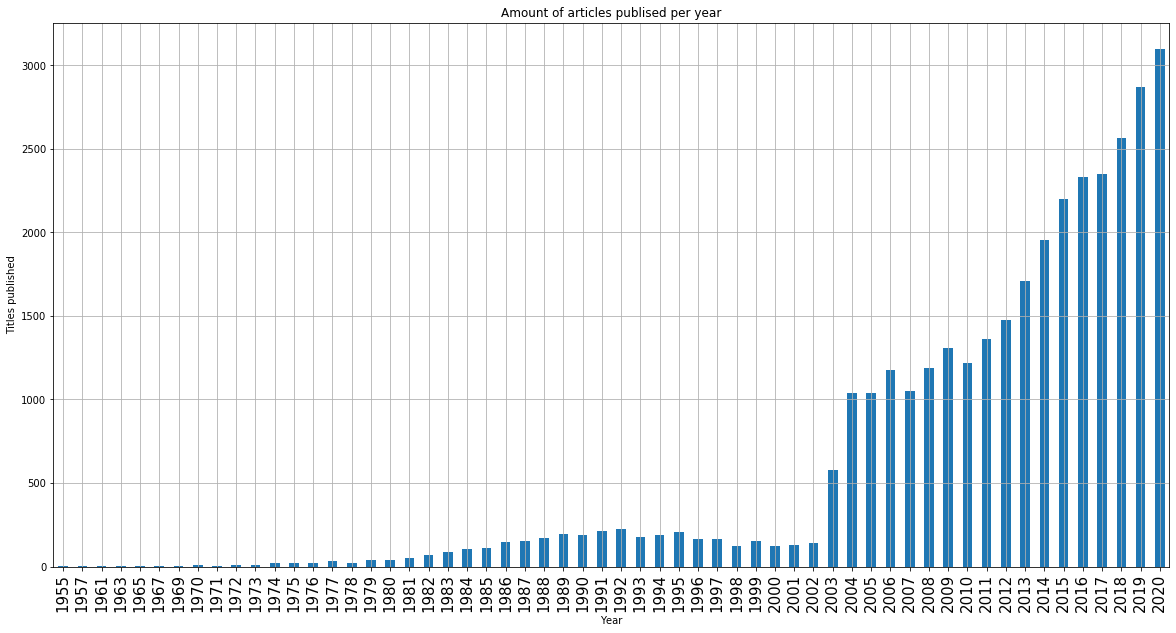

In [35]:
### plot titles per year
import matplotlib.pyplot as plt

all_corona_year.plot(kind='bar', x='Year', y='title', figsize=(20,10))
plt.xticks(size=15)
_ = plt.xlabel('Year')
_ = plt.ylabel('Titles published')
_ = plt.title('Amount of articles publised per year')
plt.grid()
plt.show()

### nr of articles per journal

In [36]:
articles_amount = all_corona['journal'].value_counts().sum()
articles_amount

print('the amount of articles is: ' + str(articles_amount))

the amount of articles is: 33107


In [37]:
journal_amount = all_corona['journal'].value_counts().count()
journal_amount

print('the amount of journals is: ' + str(journal_amount))

the amount of journals is: 3886


In [38]:
average_per_journal = articles_amount / journal_amount
print('the average nr of articles per journal is: ' + str(average_per_journal))

the average nr of articles per journal is: 8.519557385486362


In [39]:
# the 50 most popular journals

most_popular = all_corona['journal'].value_counts()[0:51]

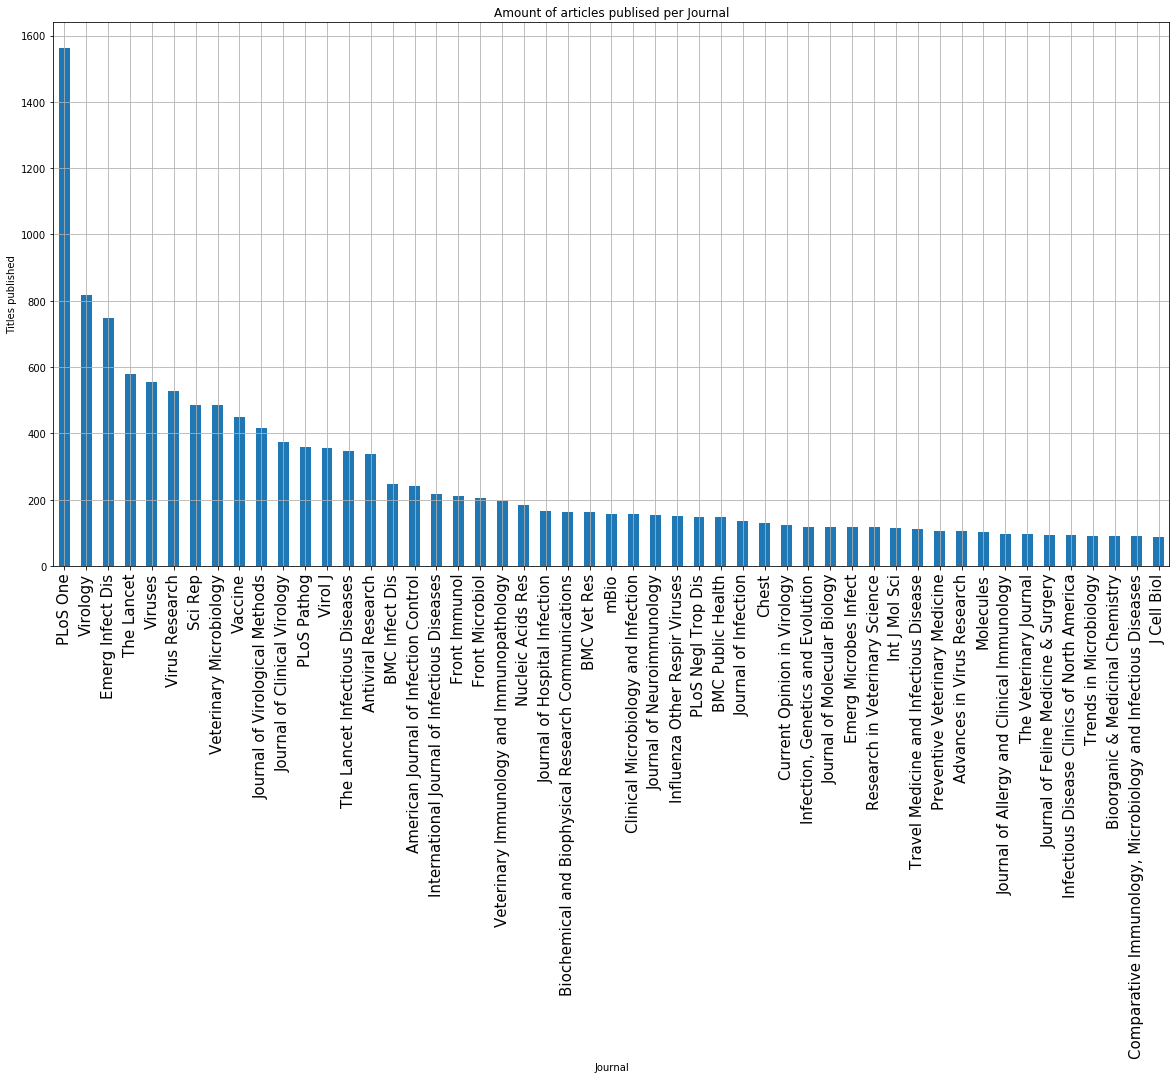

In [40]:
most_popular.plot(kind='bar', x='journal', y='title', figsize=(20,10))
plt.xticks(size=15)
_ = plt.xlabel('Journal')
_ = plt.ylabel('Titles published')
_ = plt.title('Amount of articles publised per Journal')
plt.grid()
plt.show()

### most mentioned authors

In [41]:
# goal: create dictionary with "author:amount" of articles written

#1 create list with all unique authors

#2 match list towards frequency of mentioning

#3 plot the 50 most mentioned 

all_corona.head(50)

sha  source_x  \
0                                        NaN  Elsevier   
1                                        NaN  Elsevier   
2                                        NaN  Elsevier   
3   aecbc613ebdab36753235197ffb4f35734b5ca63  Elsevier   
4                                        NaN  Elsevier   
5   212e990b378e8d267042753d5f9d4a64ea5e9869  Elsevier   
6   bf5d344243153d58be692ceb26f52c08e2bd2d2f  Elsevier   
7   ddd2ecf42ec86ad66072962081e1ce4594431f9c  Elsevier   
8   a55cb4e724091ced46b5e55b982a14525eea1c7e  Elsevier   
9   a1fd28115cfa14869f29f30d2121c1058e6e81e9  Elsevier   
10  60bf634cf15582a6b7f72eb3811ca5d8b8825c44  Elsevier   
11  b84658904af7f828615c7de04ffcb088bd49c50d  Elsevier   
12  c05ffd04482059ba3cd3965a389003e814ee2699  Elsevier   
13                                       NaN  Elsevier   
14  0fa2750b5605f80e81064c6442a823ca3bf65f85  Elsevier   
15  d9d3627bd3e93877a8934f06db472f3d641bbc99  Elsevier   
16  005d48b545794f09d6db2d03a770466dcacaf7c2  Elsevier   
17  5c2e73c15119b111f62143f5b94bc531963eb799  Elsevier   
18  8b4c7bd63dceaa9bab63a5ceefc1fdb203d1b784  Elsevier   
19  fccbe2d1dab29119bf24e065b589725df5ae2c7a  Elsevier   
20  3843020862eda73775740154e71c3e991ebaaf8f  Elsevier   
21  5055a81a32741e8c2d188c49c6e5290a09d615cd  Elsevier   
22  e6caa9eaa2171e4bc3f9ad3128989f1c2715bd91  Elsevier   
23  d8172a2a6371134b3128daffebd064ef33cd7eb5  Elsevier   
24  94e2a71897a537ab0bab3710a9efeb8f0fe0c864  Elsevier   
25  0a6b1d04aece4d54892d911e8367d0028ab78ee7  Elsevier   
26  1e47b54dffb8ee413f484a490005310037d36806  Elsevier   
27  52b3b423a2935768a26ee1f95becf72f3b27817e  Elsevier   
28                                       NaN  Elsevier   
29                                       NaN  Elsevier   
30                                       NaN  Elsevier   
31  f397b006d7382b876d534adc4f8e9c662951a580  Elsevier   
32  eb66043b10e28296ab7cf3ee0988512420d163e6  Elsevier   
33                                       NaN  Elsevier   
34  5894b74f59031a5d2da9ee87c918c322b47d45ff  Elsevier   
35  76325235ce5f04d0d8e9e973ce5ef5b4c9d09a84  Elsevier   
36                                       NaN  Elsevier   
37                                       NaN  Elsevier   
38  855d41755cb20b64c13fb7cefcab5d032c138659  Elsevier   
39  9b34c0e712078a60a3a0cee10029142d3c060be2  Elsevier   
40                                       NaN  Elsevier   
41                                       NaN  Elsevier   
42  bc2e3fa0ac457361e2ef397d6c3e0c15e1911781  Elsevier   
43  ea763d76c18c169dbea960bd078460b0e60445fb  Elsevier   
44  1bc0ed405b39562c92683ac533a41d5c67e16a84  Elsevier   
45                                       NaN  Elsevier   
46                                       NaN  Elsevier   
47                                       NaN  Elsevier   
48  5d977662d00cf3dade0ed89674fc310495dc3aa4  Elsevier   
49  3b019c97245182a2f2a638b91e7c66c269096a3a  Elsevier   

                                                title  \
0   Intrauterine virus infections and congenital h...   
1                   Coronaviruses in Balkan nephritis   
2   Cigarette smoking and coronary heart disease: ...   
3   Clinical and immunologic studies in identical ...   
4   Epidemiology of community-acquired respiratory...   
5   Infectious diarrhea: Pathogenesis and risk fac...   
6   New perspectives on the pathogenesis of rheuma...   
7   Management of acute and chronic respiratory tr...   
8   Acute bronchitis: Results of U.S. and European...   
9   Clinical and Immunologic Responses in Patients...   
10  Determination of microsomal lauric acid hydrox...   
11  Phospholipid vesicles containing bovine heart ...   
12  The oligomeric structure of renal aminopeptida...   
13  Monoclonal antibodies identify multiple epitop...   
14  Predict7, a program for protein structure pred...   
15  Suppression of MHV3 virus-activated macrophage...   
16  Broad-spectrum antiviral activity of carbodine...   
17  Inhibition of ribonucleotide reductase and gro...   

In [42]:
all_corona['authors'] = all_corona['authors'].astype('str')

author_list = []

def get_author(author):
    return author.split(';')

author_list = all_corona['authors'].apply(lambda x: get_author(x))

author_list.head(50)

0                                   [Overall, James C.]
1     [Georgescu, Leonida,  Diosi, Peter,  Buţiu, Io...
2                                    [Friedman, Gary D]
3     [Brunner, Carolyn M.,  Horwitz, David A.,  Sha...
4                               [Garibaldi, Richard A.]
5                                    [Cantey, J.Robert]
6                                 [Zvaifler, Nathan J.]
7                                  [Ellner, Jerrold J.]
8                                    [Dere, Willard H.]
9             [Knopf, Harry L.S.,  Hierholzer, John C.]
10    [Romano, Maria C.,  Straub, Kenneth M.,  Yodis...
11        [Prochaska, Lawrence J.,  Wilson, Kathryn S.]
12         [Plakidou-Dymock, Stella,  McGivan, John D.]
13    [Cherel, Isabelle,  Grosclaude, Jeanne,  Rouze...
14    [Cármenes, R.S.,  Freije, J.P.,  Molina, M.M.,...
15    [Krzystyniak, Krzysztof,  Bernier, Jacques,  H...
16    [De Clercq, Erik,  Bernaerts, Ria,  Shealy, Y....
17    [Masahiko, Matsumoto,  Fox, John G.,  Pou-